# Author: Dashyanng Kachru

# Dataset Information:
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)
10. Age level (20s, 30s, 40s, 50s, 60+)

# Data Exploration:

## Importing modules

In [1]:
import numpy as np
import pandas as pd     
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns    
from pandas.api.types import CategoricalDtype 

from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

## Loading dataset and storing in a pandas dataframe

In [2]:
df = pd.read_csv("diabetes_explore2.csv") 
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class,age_level
0,6,148,72,35,0,33.6,0.627,50,1,50s
1,1,85,66,29,0,26.6,0.351,31,0,30s
2,8,183,64,0,0,23.3,0.672,32,1,30s
3,1,89,66,23,94,28.1,0.167,21,0,20s
4,0,137,40,35,168,43.1,2.288,33,1,30s


In [3]:
df.info()  
df.shape   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
preg         768 non-null int64
plas         768 non-null int64
pres         768 non-null int64
skin         768 non-null int64
insu         768 non-null int64
mass         768 non-null float64
pedi         768 non-null float64
age          768 non-null int64
class        768 non-null int64
age_level    768 non-null object
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


(768, 10)

All variables are either int or float except for age_level which a object   
There are 768 rows and 10 columns for this dataframe

#### Summary of all variables (50% is equal to median) except for the age_level variable which is a categorical variable

In [4]:
df.describe()  

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


20s    396
30s    165
40s    118
50s     57
60+     32
Name: age_level, dtype: int64


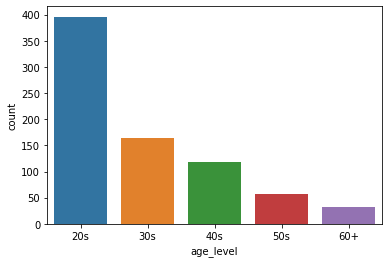

In [5]:
print(df['age_level'].value_counts())   
df['age_level'] = df['age_level'].astype('category')
df['age_level'].cat.reorder_categories(['20s', '30s', '40s', '50s', '60+'])
sns.countplot(x='age_level',data=df)

20s has the highest count for this dataset followed by 30s, 40s, 50s, 60+

## Data Cleaning

### Removing impossible values (i.e. setting them to NaN)

In [6]:
df2 = df.copy(deep=True)
df2['plas']= df2['plas'].replace(0,np.NaN)
df2['pres'] = df2['pres'].replace(0,np.NaN)
df2['skin'] = df2['skin'].replace(0,np.NaN)
df2['insu'] = df2['insu'].replace(0,np.NaN)
df2['mass'] = df2['mass'].replace(0,np.NaN)
print (df2.info())
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
preg         768 non-null int64
plas         763 non-null float64
pres         733 non-null float64
skin         541 non-null float64
insu         394 non-null float64
mass         757 non-null float64
pedi         768 non-null float64
age          768 non-null int64
class        768 non-null int64
age_level    768 non-null category
dtypes: category(1), float64(6), int64(3)
memory usage: 55.1 KB
None


,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
%matplotlib inline

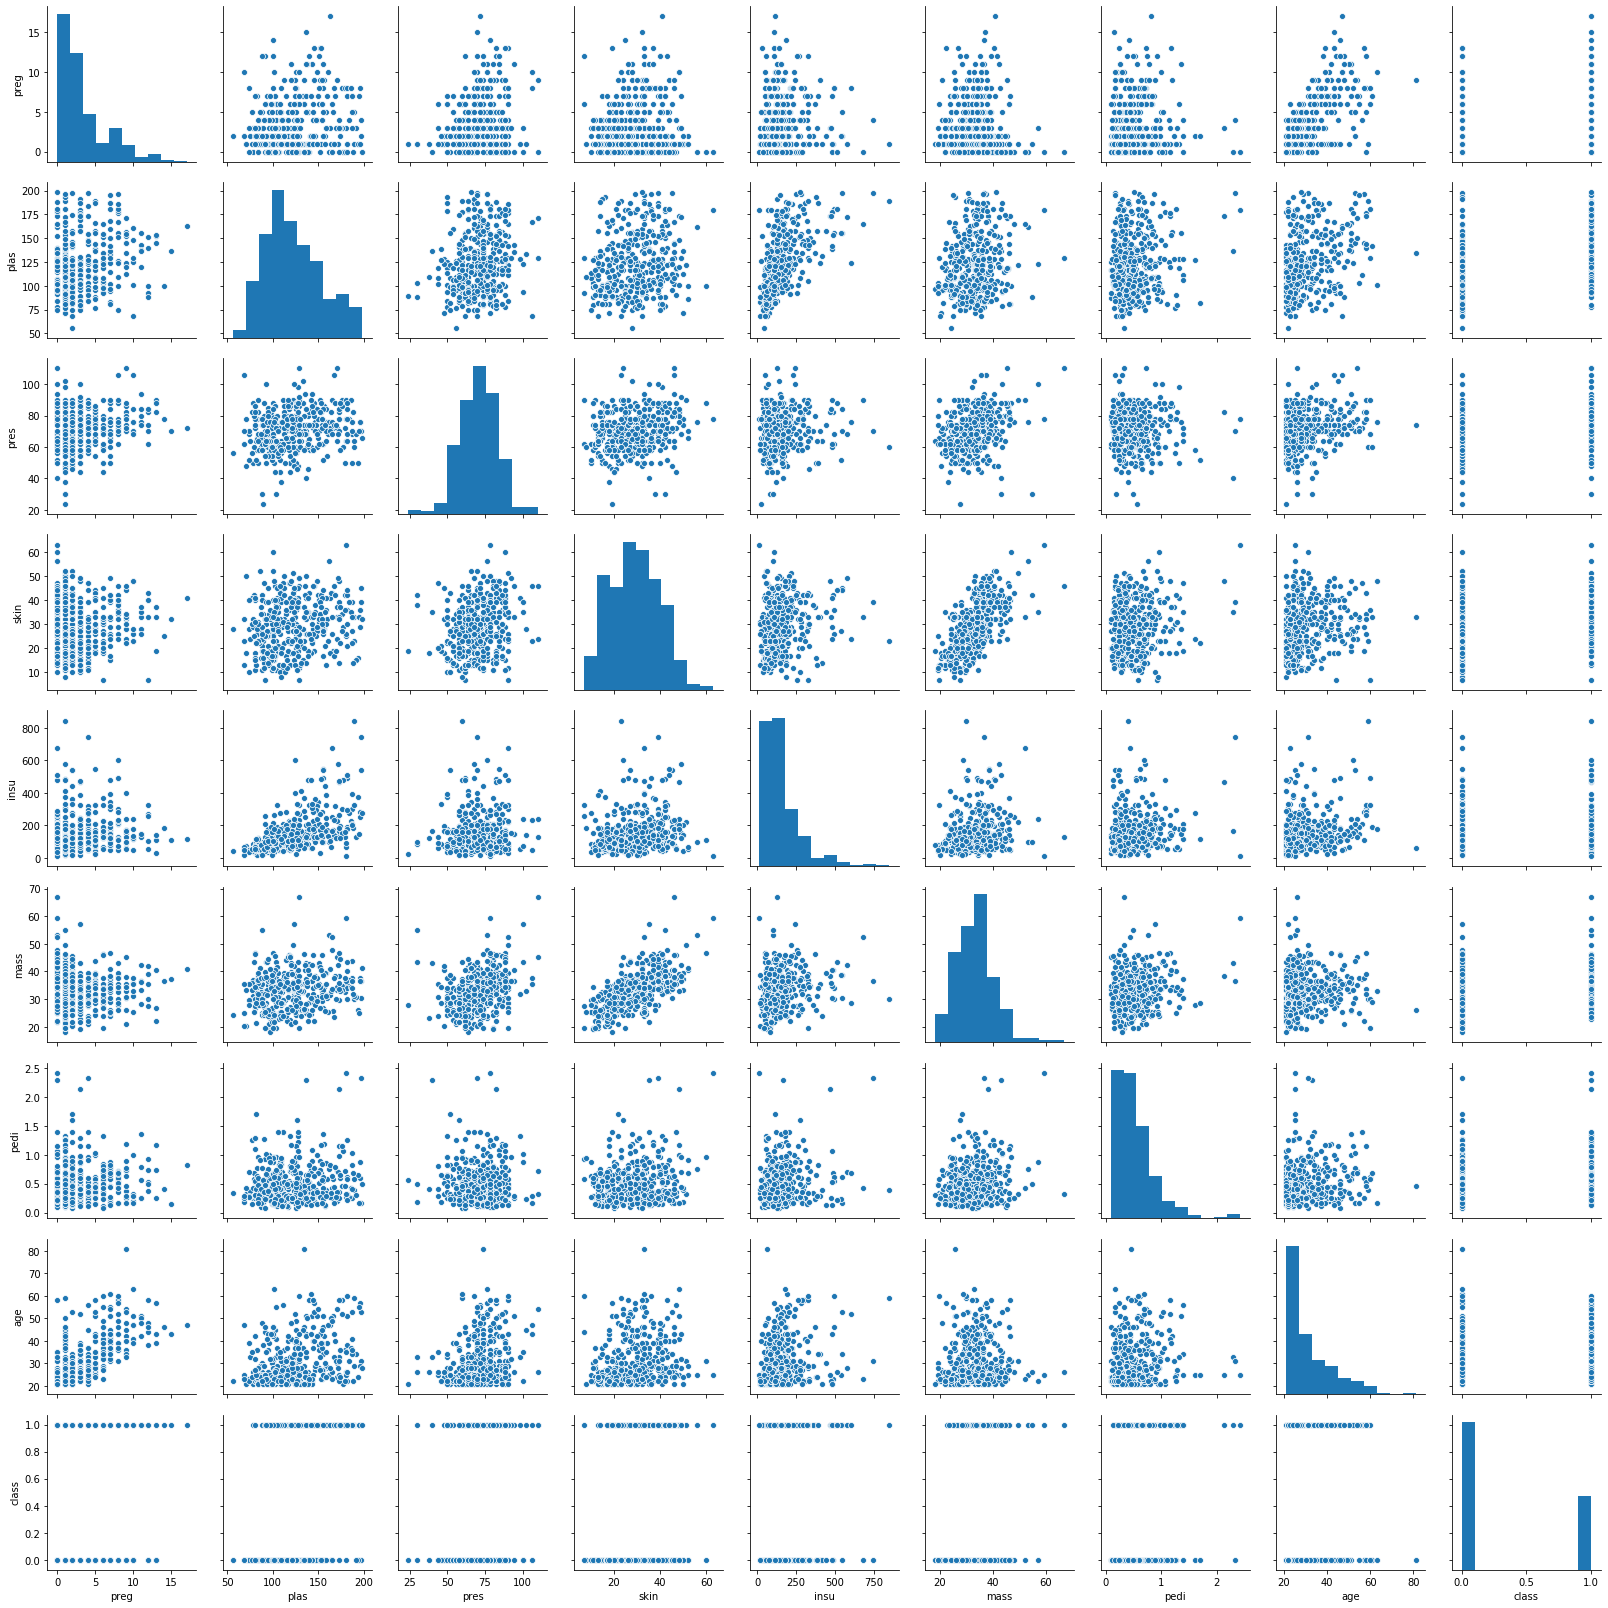

In [8]:
plot_df2 = df2.dropna()
sns.pairplot(plot_df2)

mass and skin variables show a high positive correlation  
plas and insu variables show a high positive correlation  
preg and age variables show a high positive correlation

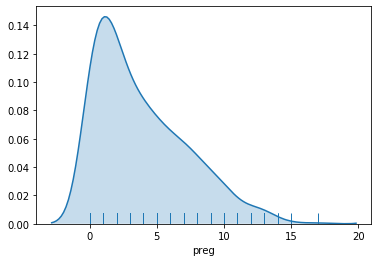

In [9]:
sns.distplot(df2['preg'], hist=False,rug=True, kde_kws={'shade':True})

Number of times mother getting pregnant has the most concentration between 0-3 for this dataset.

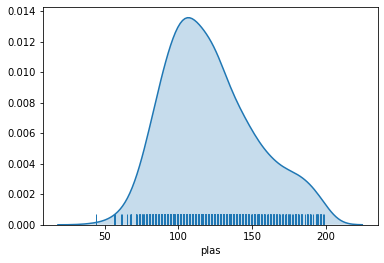

In [11]:
sns.distplot(df2['plas'], hist=False,rug=True, kde_kws={'shade':True})

Plasma glucose concentration a 2 hours in an oral glucose tolerance test is mainly concentrated between 75-150, with a peak around 110 for this dataset.

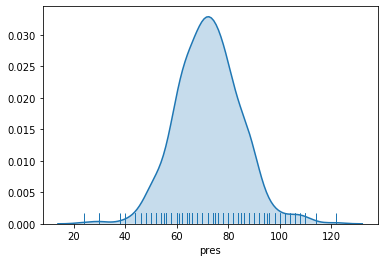

In [12]:
sns.distplot(df2['pres'], hist=False,rug=True, kde_kws={'shade':True})

Diastolic blood pressure (mm Hg) is mostly concentrated between 60-80 (mm Hg), with a peak around 75 (mm Hg) for this dataset.

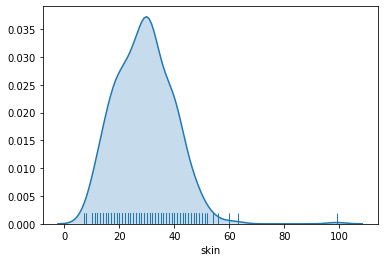

In [13]:
sns.distplot(df2['skin'], hist=False,rug=True, kde_kws={'shade':True})

Triceps skin fold thickness (mm) for this dataset is mostly concentrated between 20-40 (mm), with a peak around 30mm for this dataset.

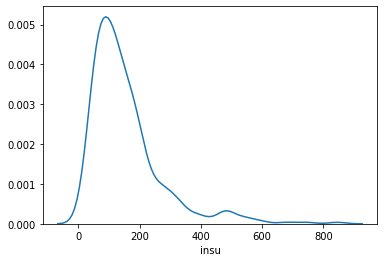

In [14]:
sns.distplot(df2['insu'], hist=False,bins=10)

insu variable is most concentrated between 50-150 2-Hour serum insulin (mu U/ml), with a peak around 100 (mu U/ml) for this dataset.

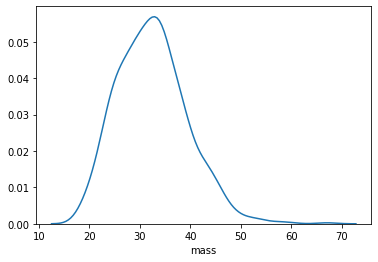

In [15]:
sns.distplot(df2['mass'], hist=False ,bins=10)

Body mass index (weight in kg/(height in m)^2) with a peak around 35 body mass index ((kg/m)^2), has the most concetration between 25-40 body mass index ((kg/m)^2)  for this dataset.

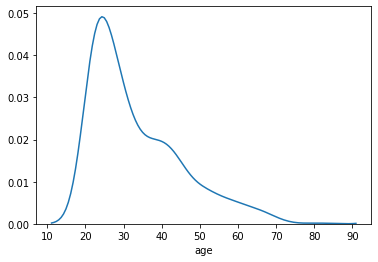

In [16]:
sns.distplot(df2['age'], hist=False ,bins=20)

Most concentration is between 20-30 years of age, with a peak around 25 years for this dataset.

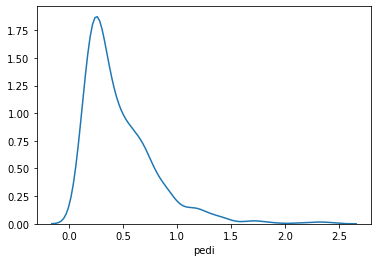

In [17]:
sns.distplot(df2['pedi'], hist=False ,bins=10)

Most concentration for pedi variable is between 0.2-0.5, with a peak around 0.3 for this dataset.

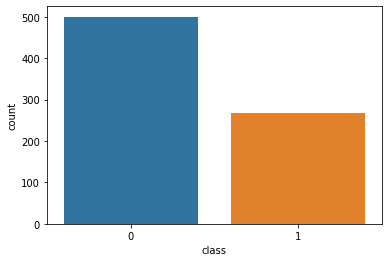

In [18]:
sns.countplot(x='class',data=df)

People who do not have diabetes have a higher count than people who have diabetes for this dataset.

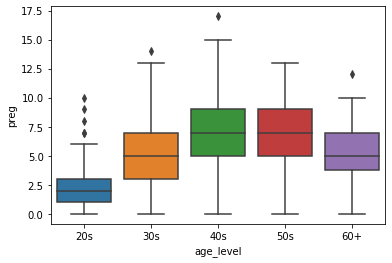

In [19]:
sns.boxplot(x="age_level",   y="preg", data=df2)

Age levels 40s and 50s have the highest median with 20s having the least median (50% of values), indicating lot many females getting pregnant even when they cross 40 years of age. 

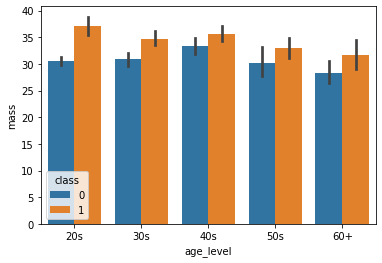

In [20]:
sns.barplot(x="age_level",   y="mass", hue="class", data=df2)

For each age level, people having diabetes tend to have a higher Body mass index (weight in kg/(height in m)^2) than people who do not have diabetes for this dataset.

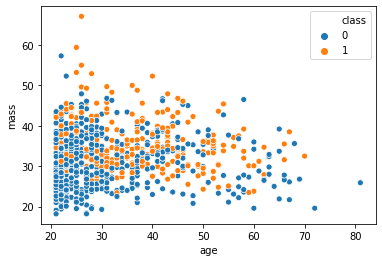

In [21]:
sns.scatterplot(x="age", y="mass", hue = 'class', data=df2)

For similar Body mass index (weight in kg/(height in m)^2), people with diabetes tend to be generally older in age than people having no diabetes for this dataset.

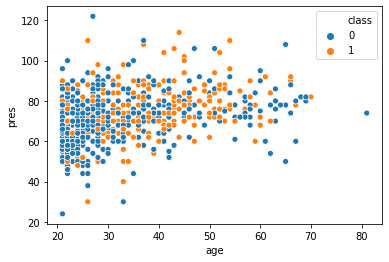

In [22]:
sns.scatterplot(x="age", y="pres", hue = 'class', data=df2)

For similar Diastolic blood pressure (mm Hg), people with diabetes tend to be generally older in age than people having no diabetes for this dataset.

### Finding correlation between variables

In [23]:
df3 = df2.copy(deep=True)
df3 = pd.get_dummies(df2,drop_first=True)
print(df3.columns)

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class',
       'age_level_30s', 'age_level_40s', 'age_level_50s', 'age_level_60+'],
      dtype='object')


In [24]:
df3.corr(method='spearman')

,preg,plas,pres,skin,insu,mass,pedi,age,class,age_level_30s,age_level_40s,age_level_50s,age_level_60+
preg,1.000000,0.129547,0.194103,0.086734,0.127859,0.000279,-0.043242,0.607216,0.198689,0.208740,0.354640,0.219378,0.091959
plas,0.129547,1.000000,0.249415,0.229815,0.658813,0.227761,0.090596,0.283315,0.483364,0.074642,0.065731,0.167921,0.121256
pres,0.194103,0.249415,1.000000,0.248017,0.130463,0.299176,0.008511,0.370609,0.177227,0.061157,0.163651,0.183955,0.109366
skin,0.086734,0.229815,0.248017,1.000000,0.245188,0.685380,0.074979,0.231132,0.265397,0.090091,0.110911,0.023317,0.009589
insu,0.127859,0.658813,0.130463,0.245188,1.000000,0.303515,0.130262,0.267437,0.377300,0.083756,0.063483,0.208816,0.079948
mass,0.000279,0.227761,0.299176,0.685380,0.303515,1.000000,0.136138,0.121119,0.309324,0.016773,0.149880,-0.014609,-0.088065
pedi,-0.043242,0.090596,0.008511,0.074979,0.130262,0.136138,1.000000,0.042909,0.175353,0.082660,-0.051694,0.032567,0.012036
age,0.607216,0.283315,0.370609,0.231132,0.267437,0.121119,0.042909,1.000000,0.309040,0.223241,0.454105,0.413653,0.346532
class,0.198689,0.483364,0.177227,0.265397,0.377300,0.309324,0.175353,0.309040,1.000000,0.122530,0.180470,0.147043,-0.029620
age_level_30s,0.208740,0.074642,0.061157,0.090091,0.083756,0.016773,0.082660,0.223241,0.122530,1.000000,-0.222878,-0.148111,-0.109074


In [25]:
print(df2.isnull().sum())    
print(df3.isnull().sum())    

preg           0
plas           5
pres          35
skin         227
insu         374
mass          11
pedi           0
age            0
class          0
age_level      0
dtype: int64
preg               0
plas               5
pres              35
skin             227
insu             374
mass              11
pedi               0
age                0
class              0
age_level_30s      0
age_level_40s      0
age_level_50s      0
age_level_60+      0
dtype: int64


In [26]:
df2 = df2.drop(labels=['insu'], axis=1)   # Dropping insu column as it missing almost half the values and it is highly
                                          # correlated with plas (0.658813)
df2 = df2.drop(labels=['skin'], axis=1)   # Dropping skin column as it missing 227 values and it is highly
                                          # correlated with mass (0.685380)
df2 = df2.drop(labels=['age_level'], axis=1)   # Since age_level is a dichotomised version of age 
df2.describe()

,preg,plas,pres,mass,pedi,age,class
count,768.000000,763.000000,733.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
preg     768 non-null int64
plas     763 non-null float64
pres     733 non-null float64
mass     757 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(4), int64(3)
memory usage: 42.1 KB


(768, 7)

In [28]:
df2.corr()

,preg,plas,pres,mass,pedi,age,class
preg,1.000000,0.128135,0.214178,0.021719,-0.033523,0.544341,0.221898
plas,0.128135,1.000000,0.223192,0.232771,0.137246,0.267136,0.494650
pres,0.214178,0.223192,1.000000,0.289230,-0.002805,0.330107,0.170589
mass,0.021719,0.232771,0.289230,1.000000,0.155382,0.025841,0.313680
pedi,-0.033523,0.137246,-0.002805,0.155382,1.000000,0.033561,0.173844
age,0.544341,0.267136,0.330107,0.025841,0.033561,1.000000,0.238356
class,0.221898,0.494650,0.170589,0.313680,0.173844,0.238356,1.000000


In [29]:
df2.to_csv("diabetes_explore2_cleaned_data.csv", sep='\t', index=False)